<a href="https://colab.research.google.com/github/horasan/ml/blob/main/1_R_LER_HOUSE_PRICE_REGRESSION_FOR_KAGGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General information

Data set: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Full notebook: https://www.kaggle.com/code/gcdatkin/top-10-house-price-regression-competition-nb

Online Graph: desmos.com

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 706.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
from google.colab import drive
%matplotlib inline
pd.set_option('display.max_columns', None) # all the columns will be shown
pd.set_option('display.max_rows', 99) # 99 of the possible rows will be shown



In [3]:
drive.mount('/content/drive')
DRIVE_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/0_R_LER/"

Mounted at /content/drive


# Things to do
1) Cleaning

2) Feature engineering

3) Feature transformation

4) Encoding

5) Scaling

6) Model selection

7) Hyperparameter optimization

8) Ensembling

9) Feature selection


# 1) Read data

In [4]:
#1_R_LER_HOUSE_PRICE_REGRESSION_FOR_KAGGLE_data_description
#1_R_LER_HOUSE_PRICE_REGRESSION_FOR_KAGGLE_sample_submission
#1_R_LER_HOUSE_PRICE_REGRESSION_FOR_KAGGLE_train
#1_R_LER_HOUSE_PRICE_REGRESSION_FOR_KAGGLE_test


train0 = pd.read_csv(DRIVE_DATASET_PATH + "1_R_LER_HOUSE_PRICE_REGRESSION_FOR_KAGGLE_train.csv")
test0 = pd.read_csv(DRIVE_DATASET_PATH + "1_R_LER_HOUSE_PRICE_REGRESSION_FOR_KAGGLE_test.csv")
sample_submission = pd.read_csv(DRIVE_DATASET_PATH + "1_R_LER_HOUSE_PRICE_REGRESSION_FOR_KAGGLE_sample_submission.csv")

In [5]:
train0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [6]:
test0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

# 2) Cleaning

## 2.1) Ensure proper data types

In [7]:
train1 = train0.copy()
train1["MSSubClass"] = train1["MSSubClass"].astype("str")

In [8]:
# find all numeric columns
all_non_numeric_columns = train1.select_dtypes(include=["object"])

all_non_numeric_columns.columns


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

## 2.2) Fill categorical Missing values (imputing)

In [9]:
# we can use "none" or mode. Some of them are missing but they have a meaning

# using a constant value.

for cons_column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    train1[cons_column] = train1[cons_column].fillna("none")

# using the mode of the column.
for cons_column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    train1[cons_column] = train1[cons_column].fillna(train1["MSSubClass"].mode()[0])

In [10]:
# check whether any missing value exists
if (train1[all_non_numeric_columns.columns].isna().sum().sum() == 0):
    print("None of the non-numeric column has missing value ")
else:
    print("Some of the non-numeric column has missing value ")

None of the non-numeric column has missing value 


## 2.3) Fill numerical Missing values (imputing)

In [11]:
# we can use KNN, but I will just use mean!
all_numeric_columns = train1.select_dtypes(include=[np.number])
all_numeric_columns.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
train1[["LotFrontage", "MasVnrArea"]].apply(np.mean, axis=0)


,0
LotFrontage,70.049958
MasVnrArea,103.685262


In [13]:
#numeric_columns_with_missing_values

In [14]:
# numeric columns ith missing values
#train1[all_numeric_columns.columns].isna().sum() > 0

numeric_columns_with_missing_values = train1.columns[train1.isna().sum() > 0]

train1[numeric_columns_with_missing_values] = train1[numeric_columns_with_missing_values].fillna(train1[numeric_columns_with_missing_values].mean())


In [15]:
#train1.query("LotFrontage > 70 and LotFrontage < 71")
train1.columns[train1.isna().sum() > 0]

Index([], dtype='object')

In [16]:
# check whether any missing value exists
if (train1.isna().sum().sum() == 0):
    print("None of the columns has missing value ")
else:
    print("Some of the columns have missing value ")

None of the columns has missing value 


In [17]:
train2 = train1.copy()

# 3) Feature Transformation


## 3.1) Check for the skewness of the columns

In [18]:
import scipy.stats

In [19]:
all_numerical_columns = train2.select_dtypes(include=np.number)
all_numerical_columns.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [20]:
#type(train2[["LotFrontage", "LotArea"]])
#scipy.stats.skew(train2[all_numerical_columns.columns])

df_skewness = pd.DataFrame(data = all_numerical_columns.columns, columns=["Feature_Name"])
df_skewness
df_skewness["skewness"] = df_skewness["Feature_Name"].apply(lambda feature: scipy.stats.skew(train2[feature]))
df_skewness["skewed"] = df_skewness["skewness"].apply(lambda skew_value: True if np.abs(skew_value) >= 0.5 else False)
df_skewness

,Feature_Name,skewness,skewed
0,Id,0.000000,False
1,LotFrontage,2.382499,True
2,LotArea,12.195142,True
3,OverallQual,0.216721,False
4,OverallCond,0.692355,True
5,YearBuilt,-0.612831,True
6,YearRemodAdd,-0.503044,True
7,MasVnrArea,2.673661,True
8,BsmtFinSF1,1.683771,True
9,BsmtFinSF2,4.250888,True


In [21]:
#type(df_skewness.query("skewed == True")["Feature_Name"].values)
skewed_column_names = df_skewness.query("skewed == True")["Feature_Name"].values
train2[skewed_column_names].describe()
# we will use the log transform for the skewed columns so that the data will be normally distrubuted.
# some of the model work better with normal distribution!

# But some of the data is 0, but log(0) is undefined!
# https://www.desmos.com/calculator check for log(x) and log(0)


,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,0.382877,1.046575,6.517808,0.613014,1978.506164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.024023,9981.264932,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.502885,0.220338,1.625393,0.644666,23.994583,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.049958,9478.500000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,1978.506164,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,1.000000,1.000000,7.000000,1.000000,2001.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,2.000000,3.000000,14.000000,3.000000,2010.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [22]:
for column in skewed_column_names:
    train2[column] = np.log1p(train2[column])
# some of the column may still be skewed but running once is generally OK.

In [23]:
#train2 = train2.drop(columns=["LotFrontage_2",	"MasVnrArea_2",	"GarageYrBlt_2"])
#train2

## 3.2) Transformation for the MoSold (Month Sold) column

MoSold column represent the months, 1-12.

But this is a cyclical feature (where 1 and 12 have the similar properties).

Also 1 is not similar to 6.


In [24]:
train3 = train2.copy()

In [25]:
# We can use cosinus transformation.
#https://www.desmos.com/calculator
# -cos(cx) --> c=0.5236

In [26]:
c = 0.5236
train3["MoSold"] = -1 * np.cos(c*train3["MoSold"])

# 4) Encoding

In [27]:
train4 = train3.copy()

In [28]:
pd.get_dummies(train4)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_none,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_20,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_20,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Function

# 5) Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
train5 = train4.copy()

In [31]:
#type(train5.select_dtypes(include=np.number))
only_numeric_columns = train5[train5.select_dtypes(include=np.number).columns]
df_target = only_numeric_columns["SalePrice"]
df_target
only_numeric_columns = only_numeric_columns.drop("SalePrice", axis=1)
only_numeric_columns = only_numeric_columns.drop("Id", axis=1)

In [32]:
only_numeric_columns

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.189655,9.042040,7,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,7.602900,2,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,-0.499998,2008
1,4.394449,9.169623,6,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,7.589336,2,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.866028,2007
2,4.234107,9.328212,7,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,7.601902,2,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,-0.000011,2008
3,4.110874,9.164401,7,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,7.600402,3,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,-0.499998,2006
4,4.442651,9.565284,8,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,7.601402,3,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,-1.000000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,6,1.791759,7.600902,7.601402,0.000000,0.000000,0.000000,6.860664,6.860664,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,2,0.693147,3,0.693147,2.079442,0.693147,7.600902,2,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,0.499992,2007
1456,4.454347,9.486152,6,1.945910,7.590347,7.595387,4.787492,6.673298,5.099866,6.380123,7.341484,7.637234,0.000000,0.0,7.637234,0.693147,0.000000,2,0.000000,3,0.693147,2.079442,1.098612,7.590347,2,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.499998,2010
1457,4.204693,9.109746,7,2.302585,7.571474,7.604396,0.000000,5.620401,0.000000,6.777647,7.050123,7.080868,7.050123,0.0,7.758333,0.000000,0.000000,2,0.000000,4,0.693147,2.302585,1.098612,7.571474,1,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,0.866028,2010
1458,4.234107,9.181735,5,1.945910,7.576097,7.599401,0.000000,3.912023,6.937314,0.000000,6.983790,6.983790,0.000000,0.0,6.983790,0.693147,0.000000,1,0.000000,2,0.693147,1.791759,0.000000,7.576097,1,240,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,0.500004,2010


In [33]:

scaler = StandardScaler()
scaler.fit(only_numeric_columns)


StandardScaler()

In [34]:
only_numeric_columns = pd.DataFrame(data = scaler.transform(only_numeric_columns), index = only_numeric_columns.index, columns=only_numeric_columns.columns)

In [35]:
only_numeric_columns

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.087206,-0.133270,0.651479,-0.460408,1.045180,0.877541,1.193074,0.779431,-0.355342,-0.340511,0.002513,-0.803645,1.180528,-0.133602,0.529194,1.148788,-0.242923,0.789741,1.258580,0.163779,-0.207607,0.946985,-1.013562,1.016709,0.311725,0.351000,-0.946701,0.845209,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,-1.266948,0.138777
1,0.563711,0.113413,-0.071836,1.948163,0.163445,-0.424186,-0.815959,0.888257,-0.355342,0.002218,0.341114,0.418479,-0.870117,-0.133602,-0.381965,-0.833225,4.021453,0.789741,-0.769639,0.163779,-0.207607,-0.226437,0.743356,-0.098044,0.311725,-0.060731,1.249540,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,0.761521,-0.614439
2,0.054079,0.420049,0.651479,-0.460408,0.980275,0.829642,1.121030,0.654803,-0.355342,0.230372,0.065397,-0.576677,1.184762,-0.133602,0.659631,1.148788,-0.242923,0.789741,1.258580,0.163779,-0.207607,-0.226437,0.743356,0.934651,0.311725,0.631726,-0.946701,0.675137,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,-0.524497,0.138777
3,-0.337602,0.103317,0.651479,-0.460408,-1.873790,-0.715872,-0.815959,0.384539,-0.355342,0.348034,-0.105819,-0.439421,1.143550,-0.133602,0.541448,1.148788,-0.242923,-1.026041,-0.769639,0.163779,-0.207607,0.397039,0.743356,0.811411,1.650307,0.790804,-0.946701,0.592558,2.844374,-0.128521,-0.292769,-0.069393,-0.190481,-1.266948,-1.367655
4,0.716916,0.878431,1.374795,-0.460408,0.947798,0.733773,1.412710,0.754400,-0.355342,0.295711,0.256237,0.112127,1.244087,-0.133602,1.282295,1.148788,-0.242923,0.789741,1.258580,1.390023,-0.207607,1.438928,0.743356,0.893592,1.650307,1.698485,1.080884,0.991848,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,-2.009422,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.235065,-0.259231,-0.071836,-0.460408,0.915305,0.733773,-0.815959,-1.414140,-0.355342,0.654093,0.096134,-0.465737,1.117594,-0.133602,0.416598,-0.833225,-0.242923,0.789741,1.258580,0.163779,-0.207607,0.397039,0.743356,0.852511,0.311725,-0.060731,-0.946701,0.653002,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,0.217978,-0.614439
1456,0.754090,0.725429,-0.071836,0.455288,0.229170,0.156540,1.004570,0.816966,2.409693,0.394815,0.515947,1.981524,-0.870117,-0.133602,1.106648,1.148788,-0.242923,0.789741,-0.769639,0.163779,-0.207607,0.397039,1.771086,-0.014949,0.311725,0.126420,1.310217,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,-1.266948,1.645210
1457,-0.039410,-0.002359,0.651479,2.574033,-0.997641,1.021093,-0.815959,0.464947,-0.355342,0.609301,0.261554,0.228208,1.271356,-0.133602,1.470102,-0.833225,-0.242923,0.789741,-0.769639,1.390023,-0.207607,1.438928,1.771086,-1.565972,-1.026858,-1.033914,-0.946701,0.837652,-0.404244,-0.128521,-0.292769,-0.069393,6.193644,0.761521,1.645210
1458,0.054079,0.136833,-0.795151,0.455288,-0.697090,0.541748,-0.815959,-0.106220,3.405917,-3.047600,0.203637,-0.077721,-0.870117,-0.133602,-0.854536,1.148788,-0.242923,-1.026041,-0.769639,-1.062465,-0.207607,-0.946189,-1.013562,-1.185994,-1.026858,-1.090059,1.328490,-1.072916,2.333532,-0.128521,-0.292769,-0.069393,-0.190481,0.217997,1.645210


In [36]:
train5[only_numeric_columns.columns] = only_numeric_columns

In [37]:
train5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,-0.087206,-0.133270,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.460408,1.045180,0.877541,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.193074,Gd,TA,PConc,Gd,TA,No,GLQ,0.779431,Unf,-0.355342,-0.340511,0.002513,GasA,Ex,Y,SBrkr,-0.803645,1.180528,-0.133602,0.529194,1.148788,-0.242923,0.789741,1.258580,0.163779,-0.207607,Gd,0.946985,Typ,-1.013562,none,Attchd,1.016709,RFn,0.311725,0.351000,TA,TA,Y,-0.946701,0.845209,-0.404244,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,-1.266948,0.138777,WD,Normal,12.247699
1,2,20,RL,0.563711,0.113413,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,-0.071836,1.948163,0.163445,-0.424186,Gable,CompShg,MetalSd,MetalSd,20,-0.815959,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.888257,Unf,-0.355342,0.002218,0.341114,GasA,Ex,Y,SBrkr,0.418479,-0.870117,-0.133602,-0.381965,-0.833225,4.021453,0.789741,-0.769639,0.163779,-0.207607,TA,-0.226437,Typ,0.743356,TA,Attchd,-0.098044,RFn,0.311725,-0.060731,TA,TA,Y,1.249540,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,0.761521,-0.614439,WD,Normal,12.109016
2,3,60,RL,0.054079,0.420049,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.460408,0.980275,0.829642,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.121030,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.654803,Unf,-0.355342,0.230372,0.065397,GasA,Ex,Y,SBrkr,-0.576677,1.184762,-0.133602,0.659631,1.148788,-0.242923,0.789741,1.258580,0.163779,-0.207607,Gd,-0.226437,Typ,0.743356,TA,Attchd,0.934651,RFn,0.311725,0.631726,TA,TA,Y,-0.946701,0.675137,-0.404244,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,-0.524497,0.138777,WD,Normal,12.317171
3,4,70,RL,-0.337602,0.103317,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651479,-0.460408,-1.873790,-0.715872,Gable,CompShg,Wd Sdng,Wd Shng,20,-0.815959,TA,TA,BrkTil,TA,Gd,No,ALQ,0.384539,Unf,-0.355342,0.348034,-0.105819,GasA,Gd,Y,SBrkr,-0.439421,1.143550,-0.133602,0.541448,1.148788,-0.242923,-1.026041,-0.769639,0.163779,-0.207607,Gd,0.397039,Typ,0.743356,Gd,Detchd,0.811411,Unf,1.650307,0.790804,TA,TA,Y,-0.946701,0.592558,2.844374,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,-1.266948,-1.367655,WD,Abnorml,11.849405
4,5,60,RL,0.716916,0.878431,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.374795,-0.460408,0.947798,0.733773,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.412710,Gd,TA,PConc,Gd,TA,Av,GLQ,0.754400,Unf,-0.355342,0.295711,0.256237,GasA,Ex,Y,SBrkr,0.112127,1.244087,-0.133602,1.282295,1.148788,-0.242923,0.789741,1.258580,1.390023,-0.207607,Gd,1.438928,Typ,0.743356,TA,Attchd,0.893592,RFn,1.650307,1.698485,TA,TA,Y,1.080884,0.991848,-0.404244,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,-2.009422,0.138777,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,-0.235065,-0.259231,Pave,none,Reg,Lvl,

# 6) Target Transformation

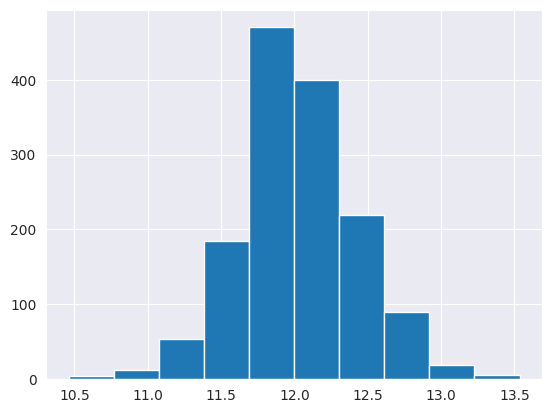

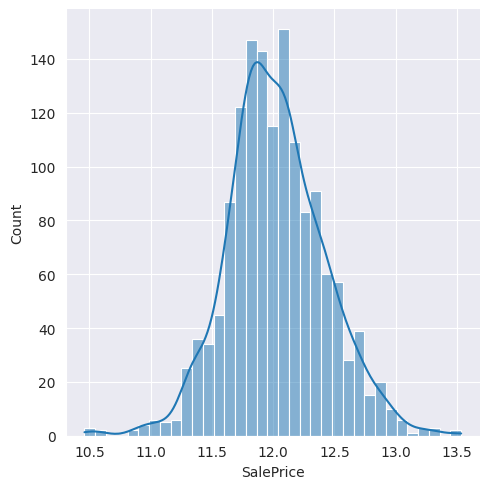

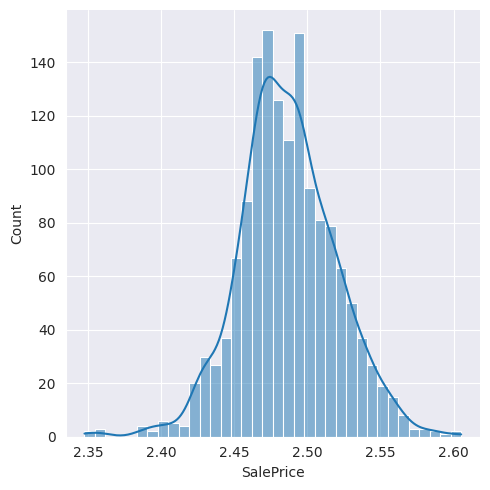

In [38]:
# i will not implement any target transformation.
# df_target is right-skewed. This might be better if log is used!
df_target.hist()
sns.displot(df_target, kde=True)
sns.displot(np.log(df_target), kde=True)

#7) Model Selection

In [39]:
train6 = train5.copy()
train6

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,-0.087206,-0.133270,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.460408,1.045180,0.877541,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.193074,Gd,TA,PConc,Gd,TA,No,GLQ,0.779431,Unf,-0.355342,-0.340511,0.002513,GasA,Ex,Y,SBrkr,-0.803645,1.180528,-0.133602,0.529194,1.148788,-0.242923,0.789741,1.258580,0.163779,-0.207607,Gd,0.946985,Typ,-1.013562,none,Attchd,1.016709,RFn,0.311725,0.351000,TA,TA,Y,-0.946701,0.845209,-0.404244,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,-1.266948,0.138777,WD,Normal,12.247699
1,2,20,RL,0.563711,0.113413,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,-0.071836,1.948163,0.163445,-0.424186,Gable,CompShg,MetalSd,MetalSd,20,-0.815959,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.888257,Unf,-0.355342,0.002218,0.341114,GasA,Ex,Y,SBrkr,0.418479,-0.870117,-0.133602,-0.381965,-0.833225,4.021453,0.789741,-0.769639,0.163779,-0.207607,TA,-0.226437,Typ,0.743356,TA,Attchd,-0.098044,RFn,0.311725,-0.060731,TA,TA,Y,1.249540,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,0.761521,-0.614439,WD,Normal,12.109016
2,3,60,RL,0.054079,0.420049,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.460408,0.980275,0.829642,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.121030,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.654803,Unf,-0.355342,0.230372,0.065397,GasA,Ex,Y,SBrkr,-0.576677,1.184762,-0.133602,0.659631,1.148788,-0.242923,0.789741,1.258580,0.163779,-0.207607,Gd,-0.226437,Typ,0.743356,TA,Attchd,0.934651,RFn,0.311725,0.631726,TA,TA,Y,-0.946701,0.675137,-0.404244,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,-0.524497,0.138777,WD,Normal,12.317171
3,4,70,RL,-0.337602,0.103317,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651479,-0.460408,-1.873790,-0.715872,Gable,CompShg,Wd Sdng,Wd Shng,20,-0.815959,TA,TA,BrkTil,TA,Gd,No,ALQ,0.384539,Unf,-0.355342,0.348034,-0.105819,GasA,Gd,Y,SBrkr,-0.439421,1.143550,-0.133602,0.541448,1.148788,-0.242923,-1.026041,-0.769639,0.163779,-0.207607,Gd,0.397039,Typ,0.743356,Gd,Detchd,0.811411,Unf,1.650307,0.790804,TA,TA,Y,-0.946701,0.592558,2.844374,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,-1.266948,-1.367655,WD,Abnorml,11.849405
4,5,60,RL,0.716916,0.878431,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.374795,-0.460408,0.947798,0.733773,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.412710,Gd,TA,PConc,Gd,TA,Av,GLQ,0.754400,Unf,-0.355342,0.295711,0.256237,GasA,Ex,Y,SBrkr,0.112127,1.244087,-0.133602,1.282295,1.148788,-0.242923,0.789741,1.258580,1.390023,-0.207607,Gd,1.438928,Typ,0.743356,TA,Attchd,0.893592,RFn,1.650307,1.698485,TA,TA,Y,1.080884,0.991848,-0.404244,-0.128521,-0.292769,-0.069393,none,none,none,-0.190481,-2.009422,0.138777,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,-0.235065,-0.259231,Pave,none,Reg,Lvl,

## 7.1) Using pycaret and compare_models object

In [40]:
from pycaret.regression import setup, compare_models

In [41]:
# Here i will use, pycaret --> go to top and run !pip install pycaret, done.
_ = setup(data=train6, target="SalePrice")

,Description,Value
0,Session id,4361
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 310)"
5,Transformed train set shape,"(1021, 310)"
6,Transformed test set shape,"(439, 310)"
7,Numeric features,36
8,Categorical features,44
9,Preprocess,True


In [42]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0837,0.0184,0.1308,0.8853,0.0100,0.0070,1.0960
gbr,Gradient Boosting Regressor,0.0900,0.0183,0.1338,0.8852,0.0104,0.0075,1.8620
ridge,Ridge Regression,0.0870,0.0192,0.1340,0.8798,0.0103,0.0073,0.9550
lightgbm,Light Gradient Boosting Machine,0.0946,0.0202,0.1403,0.8734,0.0109,0.0079,3.1610
omp,Orthogonal Matching Pursuit,0.0923,0.0210,0.1408,0.8690,0.0108,0.0077,0.8230
rf,Random Forest Regressor,0.0984,0.0225,0.1486,0.8585,0.0115,0.0082,3.9950
xgboost,Extreme Gradient Boosting,0.1020,0.0245,0.1538,0.8485,0.0119,0.0085,1.7710
et,Extra Trees Regressor,0.1038,0.0245,0.1546,0.8457,0.0120,0.0087,3.9300
ada,AdaBoost Regressor,0.1287,0.0309,0.1749,0.8048,0.0135,0.0107,1.5660
lr,Linear Regression,0.0977,0.0351,0.1732,0.7774,0.0130,0.0082,1.6940


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

BayesianRidge()

As seen above,  top 6 is given as
- br	Bayesian Ridge, x
- ridge	Ridge Regression, x
- gbr	Gradient Boosting Regressor, x
- lightgbm	Light Gradient Boosting Machine, x
- et	Extra Trees Regressor, (i did not take this one)
- omp	Orthogonal Matching Pursuit x

In [43]:
from sklearn.linear_model import BayesianRidge, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## 7.2) Base model training and prediction

In [44]:
from sklearn.model_selection import KFold, cross_val_score

In [45]:
X=train6.drop("SalePrice", axis=1)
y = train6["SalePrice"]


In [46]:
y

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1455,12.072547
1456,12.254868
1457,12.493133
1458,11.864469


In [47]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,-0.087206,-0.133270,Pave,none,Reg,Lvl,AllPub,...,-0.292769,-0.069393,none,none,none,-0.190481,-1.266948,0.138777,WD,Normal
1,2,20,RL,0.563711,0.113413,Pave,none,Reg,Lvl,AllPub,...,-0.292769,-0.069393,none,none,none,-0.190481,0.761521,-0.614439,WD,Normal
2,3,60,RL,0.054079,0.420049,Pave,none,IR1,Lvl,AllPub,...,-0.292769,-0.069393,none,none,none,-0.190481,-0.524497,0.138777,WD,Normal
3,4,70,RL,-0.337602,0.103317,Pave,none,IR1,Lvl,AllPub,...,-0.292769,-0.069393,none,none,none,-0.190481,-1.266948,-1.367655,WD,Abnorml
4,5,60,RL,0.716916,0.878431,Pave,none,IR1,Lvl,AllPub,...,-0.292769,-0.069393,none,none,none,-0.190481,-2.009422,0.138777,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,-0.235065,-0.259231,Pave,none,Reg,Lvl,AllPub,...,-0.292769,-0.069393,none,none,none,-0.190481,0.217978,-0.614439,WD,Normal
1456,1457,20,RL,0.754090,0.725429,Pave,none,Reg,Lvl,AllPub,...,-0.292769,-0.069393,none,MnPrv,none,-0.190481,-1.266948,1.645210,WD,Normal
1457,1458,70,RL,-0.039410,-0.002359,Pave,none,Reg,Lvl,AllPub,...,-0.292769,-0.069393,none,GdPrv,Shed,6.193644,0.761521,1.645210,WD,Normal
1458,1459,20,RL,0.054079,0.136833,Pave,none,Reg,Lvl,AllPub,...,-0.292769,-0.069393,none,none,none,-0.190481,0.217997,1.645210,WD,Normal


In [48]:
# I will convert all the object columns to categorical type
# since BayesianRidge() cannot work with strings
categorical_columns_in_X = X.select_dtypes(include="object")
X[categorical_columns_in_X.columns] = X[categorical_columns_in_X.columns].astype('category')


In [49]:
X[categorical_columns_in_X.columns] = X[categorical_columns_in_X.columns].apply(lambda data: data.cat.codes)

In [50]:
base_model = BayesianRidge()
base_model.fit(X, y)

BayesianRidge()

In [51]:
kf =  KFold(n_splits=10)

results = cross_val_score(base_model, X, y, scoring="neg_mean_squared_log_error", cv=kf)

In [52]:
results

array([-8.58877206e-05, -6.55833227e-05, -7.74254726e-05, -1.69562490e-04,
       -1.28149660e-04, -8.42477413e-05, -9.53116203e-05, -7.72616116e-05,
       -1.84069437e-04, -1.01479264e-04])

In [53]:
np.sqrt(-1 * np.mean(results))

0.01033914087185618

## 7.3) Combine all the models (top 5)

In [53]:
# todo we can combine the top 5 models